### Import packages

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import copy
import math

%matplotlib inline

In [153]:
%pip install ydata-profiling
from ydata_profiling import ProfileReport

### Read data

In [156]:
data = pd.read_csv("brain_stroke.csv",thousands=',', skipinitialspace=True)
#data = pd.read_csv("churn-bigml-80.csv", thousands=',', skipinitialspace=True)
data

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0             Urban             228.69  36.6  formerly smoked       1  
1             Rural             105.92  32.5     never smoked       1  
2             Urban             171.23  34.4           smokes       1  
3             Rural             174.12  24.0     never smoked       1  
4             Urban             186.21  29.0  formerly smoked       1  
...             ...                ...   ...              ...     ...  
4976          Rural              70.15  29.8  formerly smoked       0  
4977          Urban             191.15  31.1           smokes       0  
4978          Rural              95.02  31.8           smokes       0  
4979          Rural              83.94  30.0           smokes       0  
4980          Urban              83.75  29.1     never smoked       0  

[4981 rows x 11 columns]

### Drop empty lines in data and remove NAN's

In [157]:
data = data.dropna()
data

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0             Urban             228.69  36.6  formerly smoked       1  
1             Rural             105.92  32.5     never smoked       1  
2             Urban             171.23  34.4           smokes       1  
3             Rural             174.12  24.0     never smoked       1  
4             Urban             186.21  29.0  formerly smoked       1  
...             ...                ...   ...              ...     ...  
4976          Rural              70.15  29.8  formerly smoked       0  
4977          Urban             191.15  31.1           smokes       0  
4978          Rural              95.02  31.8           smokes       0  
4979          Rural              83.94  30.0           smokes       0  
4980          Urban              83.75  29.1     never smoked       0  

[4981 rows x 11 columns]

### Reset the index for potentially removed rows in data

In [159]:
data = data.reset_index(drop=True)

## EDA - Exploratory Data Analysis

### View data statistics - short format

In [160]:
data.describe()

age  hypertension  heart_disease  avg_glucose_level  \
count  4981.000000   4981.000000    4981.000000        4981.000000   
mean     43.419859      0.096165       0.055210         105.943562   
std      22.662755      0.294848       0.228412          45.075373   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.230000   
50%      45.000000      0.000000       0.000000          91.850000   
75%      61.000000      0.000000       0.000000         113.860000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4981.000000  4981.000000  
mean     28.498173     0.049789  
std       6.790464     0.217531  
min      14.000000     0.000000  
25%      23.700000     0.000000  
50%      28.100000     0.000000  
75%      32.600000     0.000000  
max      48.900000     1.000000

### View data statistics - long format

In [163]:
profile = ProfileReport(data, title="Brain Stroke Dataset")

In [164]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 11/11 [00:00<00:00, 36.43it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Important: We have 95.021% samples without stroke and 4.978% samples with stroke in our dataset

In [167]:
data['stroke'].value_counts(normalize=True) * 100

stroke
0    95.02108
1     4.97892
Name: proportion, dtype: float64

### Change categorical string/boolean columns to categorical integer columns

In [170]:

data['gender'] = data['gender'].astype('category').cat.codes
data['ever_married'] = data['ever_married'].astype('category').cat.codes
data['work_type'] = data['work_type'].astype('category').cat.codes
data['Residence_type'] = data['Residence_type'].astype('category').cat.codes
data['smoking_status'] = data['smoking_status'].astype('category').cat.codes


In [171]:
data

gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          1   
1          1  80.0             0              1             1          1   
2          0  49.0             0              0             1          1   
3          0  79.0             1              0             1          2   
4          1  81.0             0              0             1          1   
...      ...   ...           ...            ...           ...        ...   
4976       1  41.0             0              0             0          1   
4977       1  40.0             0              0             1          1   
4978       0  45.0             1              0             1          0   
4979       1  40.0             0              0             1          1   
4980       0  80.0             1              0             1          1   

      Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0                  1             228.69  36.6               1       1  
1                  0             105.92  32.5               2       1  
2                  1             171.23  34.4               3       1  
3                  0             174.12  24.0               2       1  
4                  1             186.21  29.0               1       1  
...              ...                ...   ...             ...     ...  
4976               0              70.15  29.8               1       0  
4977               1             191.15  31.1               3       0  
4978               0              95.02  31.8               3       0  
4979               0              83.94  30.0               3       0  
4980               1              83.75  29.1               2       0  

[4981 rows x 11 columns]

### Create x and y from original data

In [174]:
x_data = data.drop(columns=['stroke'])
x_data

gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          1   
1          1  80.0             0              1             1          1   
2          0  49.0             0              0             1          1   
3          0  79.0             1              0             1          2   
4          1  81.0             0              0             1          1   
...      ...   ...           ...            ...           ...        ...   
4976       1  41.0             0              0             0          1   
4977       1  40.0             0              0             1          1   
4978       0  45.0             1              0             1          0   
4979       1  40.0             0              0             1          1   
4980       0  80.0             1              0             1          1   

      Residence_type  avg_glucose_level   bmi  smoking_status  
0                  1             228.69  36.6               1  
1                  0             105.92  32.5               2  
2                  1             171.23  34.4               3  
3                  0             174.12  24.0               2  
4                  1             186.21  29.0               1  
...              ...                ...   ...             ...  
4976               0              70.15  29.8               1  
4977               1             191.15  31.1               3  
4978               0              95.02  31.8               3  
4979               0              83.94  30.0               3  
4980               1              83.75  29.1               2  

[4981 rows x 10 columns]

In [175]:
y_data = data[['stroke']]
y_data

stroke
0          1
1          1
2          1
3          1
4          1
...      ...
4976       0
4977       0
4978       0
4979       0
4980       0

[4981 rows x 1 columns]

### View features against Glucose level

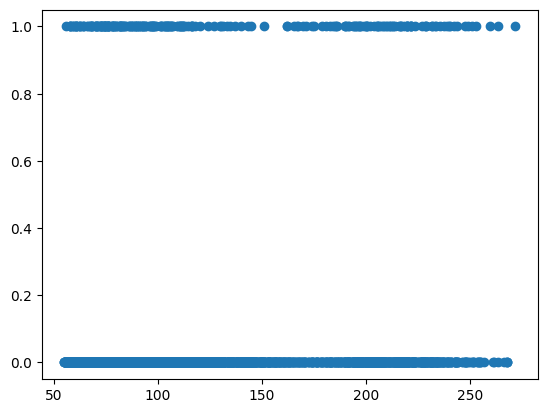

In [178]:
plt.scatter(x_data['avg_glucose_level'], y_data)


### Split data into training and validation datasets: Default 80% train, 20% validation

In [179]:
x_train, x_validation, y_train, y_validation = train_test_split(x_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

### Visualize how one sample looks like

In [180]:
x_train = x_train.to_numpy()
x_validation = x_validation.to_numpy()
y_train = y_train.to_numpy()
y_validation = y_validation.to_numpy()

In [181]:
x_train[0]

array([  0.  ,  24.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  , 187.99,
        24.9 ,   3.  ])

### Visualize the nuber of training samples and number of validation samples

In [183]:
len(y_train), len(y_validation)

(3984, 997)

### Visualize the number of no stroke vs stroke samples in training dataset

#### Having 95.021% samples with no stroke and 4.979% samples with stroke in our dataset  
#### So we have a ratio of approximately 19 no-stroke samples to 1 stroke sample
#### Our training and validation dataset should respect this ratio approximately

In [184]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([3786,  198]))

#### 4733 samples of 0 (no stroke) and 248 samples of 1 (stroke)  
#### 248 * 19 = 4712


### Visualize the number of no stroke vs stroke samples in validation dataset

#### 4733 samples of 0 (no stroke) and 248 samples of 1 (stroke)  
#### 248 * 19 = 4712


In [59]:
np.unique(y_validation, return_counts=True)

(array([0, 1], dtype=int8), array([115,  19]))

### Standardization - mean and standard deviation calculation

In [185]:
mean   = np.mean(x_train, axis=0)
sigma  = np.std(x_train, axis=0)

In [186]:
x_train = (x_train - mean) / sigma

### Very important! Validation dataset MUST BE standardized using mean and standard deviation calculated from the training dataset

In [187]:
x_validation = (x_validation - mean) / sigma

### View min and max values after standardization from training dataset

In [188]:
x_train.min(), x_train.max()

(np.float64(-2.1572446501419913), np.float64(4.18691205521916))

### View min and max values after standardization from training dataset

In [189]:
x_validation.min(), x_validation.max()

(np.float64(-2.1424494670349197), np.float64(4.18691205521916))

### Logistic Regression implementation

In [190]:
def sigmoid(x):
    g = 1 / (1 + np.exp(-x))
    return g

#### Examples of using sigmoid values

In [191]:
sigmoid(1)

np.float64(0.7310585786300049)

In [192]:
sigmoid(0)

np.float64(0.5)

In [193]:
sigmoid(-1)

np.float64(0.2689414213699951)

In [194]:
sigmoid(-1000)

<ipython-input-190-0b81d26b1f5a>:2: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-x))


np.float64(0.0)

In [195]:
sigmoid(100)

np.float64(1.0)

In [196]:
def compute_cost(X, y, w, b, lambda_=1):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i)

    cost = cost / m
    return cost

In [197]:
def compute_gradient(X, y, w, b, lambda_=1):
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i], w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] += err_i * X[i,j]      #scalar
        dj_db += err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar

    return dj_db, dj_dw

In [198]:
def gradient_descent(x_train, y_train, x_validation, y_validation, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_=1):
    # number of training examples
    import os
    m = len(x_train)
    os.makedirs("model", exist_ok=True)

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_train_history = []
    J_valid_history = []
    w_history = []

    best_train_score = cost_function(x_train, y_train, w_in, b_in, lambda_)
    best_validation_score = cost_valid =  compute_cost(x_validation, y_validation, w_in, b_in, lambda_)
    best_w_in_train = copy.deepcopy(w_in)
    best_b_train = copy.deepcopy(b_in)
    best_w_in_valid = copy.deepcopy(w_in)
    best_b_valid = copy.deepcopy(b_in)

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(x_train, y_train, w_in, b_in, lambda_)

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        cost_train =  cost_function(x_train, y_train, w_in, b_in, lambda_)
        J_train_history.append(cost_train)

        cost_valid =  compute_cost(x_validation, y_validation, w_in, b_in, lambda_)
        J_valid_history.append(cost_valid)

        if best_train_score > cost_train:
            best_train_score = cost_train
            np.save(f'model/best_train_w_in.npy', w_in)    # .npy extension is added if not given
            np.save(f'model/best_train_b.npy', b_in)


        if best_validation_score > cost_valid:
            best_validation_score = cost_valid
            np.save(f'model/best_valid_w_in.npy', w_in)    # .npy extension is added if not given
            np.save(f'model/best_valid_b.npy', b_in)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost Train: {float(J_train_history[-1].squeeze()):f} \t  Cost Validation: {float(J_valid_history[-1].squeeze()):f}")

    return w_in, b_in, J_train_history, J_valid_history, w_history #return w and J,w history for graphing

In [199]:
initial_w = np.zeros(len(x_train[0]))
initial_b = 0

# Some gradient descent settings
iterations = 1000
alpha = 3
lambda_ = 0

w_final, b_final, J_train_history, J_valid_history, _ = gradient_descent(x_train=x_train, y_train=y_train, x_validation=x_validation, y_validation=y_validation, w_in=initial_w, b_in=initial_b, cost_function=compute_cost, gradient_function=compute_gradient, alpha=alpha, num_iters=iterations, lambda_=lambda_)

<ipython-input-197-ca3a02e9c328>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j] += err_i * X[i,j]      #scalar


Iteration    0: Cost Train: 0.288842 	  Cost Validation: 0.288400
Iteration  100: Cost Train: 0.158104 	  Cost Validation: 0.159872
Iteration  200: Cost Train: 0.158033 	  Cost Validation: 0.159506
Iteration  300: Cost Train: 0.158032 	  Cost Validation: 0.159466
Iteration  400: Cost Train: 0.158032 	  Cost Validation: 0.159461
Iteration  500: Cost Train: 0.158032 	  Cost Validation: 0.159460
Iteration  600: Cost Train: 0.158032 	  Cost Validation: 0.159460
Iteration  700: Cost Train: 0.158032 	  Cost Validation: 0.159460
Iteration  800: Cost Train: 0.158032 	  Cost Validation: 0.159460
Iteration  900: Cost Train: 0.158032 	  Cost Validation: 0.159460
Iteration  999: Cost Train: 0.158032 	  Cost Validation: 0.159460


In [200]:
best_w_final = np.load('model/best_valid_w_in.npy')
best_b_final = np.load('model/best_valid_b.npy')

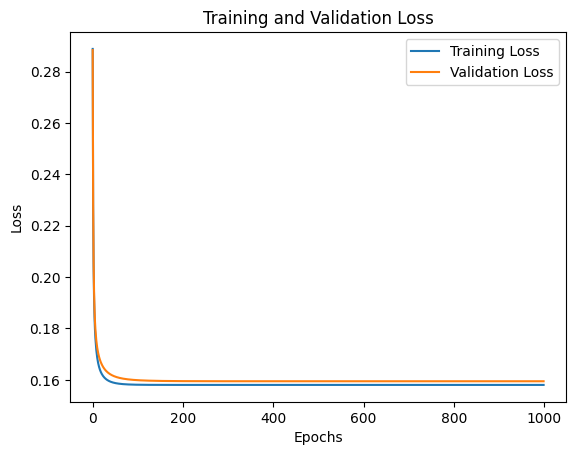

In [201]:
# Generate a sequence of integers to represent the epoch numbers
#epochs = range(1, iterations+1)

# Plot and label the training and validation loss values
plt.plot(J_train_history, label='Training Loss')
plt.plot(J_valid_history, label='Validation Loss')

# Add in a title and axes labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Set the tick locations
#plt.xticks(np.arange(0, iterations+1, 2))

# Display the plot
plt.legend(loc='best')
plt.show()

In [202]:
def predict(X, w, b):
    # number of training examples
    m, n = X.shape
    p = np.zeros(m)

    for i in range(m):
        z_wb = 0
        # Loop over each feature
        for j in range(n):
            # Add the corresponding term to z_wb
            z_wb += X[i][j] * w[j]

        # Add bias term
        z_wb += b

        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        p[i] = f_wb >= 0.5

    return p

In [203]:
y_predicted = predict(x_train, w_final, b_final)

<ipython-input-202-bde3be517903>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p[i] = f_wb >= 0.5


In [204]:
y_train.shape

(3984, 1)

In [205]:
y_train.reshape(-1).shape, y_predicted.shape

((3984,), (3984,))

In [206]:
(y_train.reshape(-1) == y_predicted).sum()

np.int64(3786)

In [207]:
x_train.shape
x_train.shape

(3984, 10)

In [208]:
y_train = y_train.reshape(-1)

In [210]:
type(y_predicted)

numpy.ndarray

In [211]:
def metrics_computations(x:np.array,
                         y_true:np.array,
                         y_predicted: np.array):
    total_number_of_samples = x.shape[0]
    accuracy = (y_true == y_predicted).sum() / total_number_of_samples
    true_positive = ((y_predicted == 1) & (y_true == 1)).sum()
    false_positive = ((y_predicted == 1) & (y_true == 0)).sum()
    false_negative = ((y_predicted == 0) & (y_true == 1)).sum()
    true_negative = ((y_predicted == 0) & (y_true == 0)).sum()

    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    specificity = true_negative / (true_negative + false_positive)
    f1_score = (2 * precision * recall) / (precision + recall)

    false_negative_rate = false_negative / (false_negative + true_positive)
    false_positive_rate = false_positive / (false_positive + true_negative)

    return (accuracy, precision, recall, specificity, f1_score, false_negative_rate, false_positive_rate)

In [212]:
(accuracy, precision, recall, specificity, f1_score, false_negative_rate, false_positive_rate) = metrics_computations(x=x_train,
                                                                                                                     y_true=y_train,
                                                                                                                     y_predicted=y_predicted)

<ipython-input-211-78dae71eb1fc>:11: RuntimeWarning: invalid value encountered in scalar divide
  precision = true_positive / (true_positive + false_positive)


In [213]:
print(f"[TRAIN] Accuracy: {(accuracy * 100.):.2f}% \n Precision: {(precision * 100):.2f}% \n Recall: {(recall * 100):.2f}% \n F1 Score: {(f1_score * 100.):.2f}% \n Specificity: {(specificity * 100):.2f}% \n False Positive Rate: {(false_positive_rate * 100):.2f}% \n False Negative Rate: {(false_negative_rate * 100):.2f}%")

[TRAIN] Accuracy: 95.03% 
 Precision: nan% 
 Recall: 0.00% 
 F1 Score: nan% 
 Specificity: 100.00% 
 False Positive Rate: 0.00% 
 False Negative Rate: 100.00%


In [214]:
y_predicted_validation = predict(x_validation, w_final, b_final)

<ipython-input-202-bde3be517903>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p[i] = f_wb >= 0.5


In [215]:
y_validation = y_validation.reshape(-1)

In [216]:
for i, j in zip(y_validation, y_predicted_validation):
    print(i, j)

0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 0.0
0 0.0
0 0.0
0 0.0
1 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.

In [217]:
(accuracy, precision, recall, specificity, f1_score, false_negative_rate, false_positive_rate) = metrics_computations(x=x_validation,
                                                                                                                     y_true=y_validation,
                                                                                                                     y_predicted=y_predicted_validation)

<ipython-input-211-78dae71eb1fc>:11: RuntimeWarning: invalid value encountered in scalar divide
  precision = true_positive / (true_positive + false_positive)


In [218]:
print(f"[Valid] Accuracy: {(accuracy * 100.):.2f}% \n Precision: {(precision * 100):.2f}% \n Recall: {(recall * 100):.2f}% \n F1 Score: {(f1_score * 100.):.2f}% \n Specificity: {(specificity * 100):.2f}% \n False Positive Rate: {(false_positive_rate * 100):.2f}% \n False Negative Rate: {(false_negative_rate * 100):.2f}%")

[Valid] Accuracy: 94.98% 
 Precision: nan% 
 Recall: 0.00% 
 F1 Score: nan% 
 Specificity: 100.00% 
 False Positive Rate: 0.00% 
 False Negative Rate: 100.00%


### Analyze the feature importance

<Axes: ylabel='Feature'>

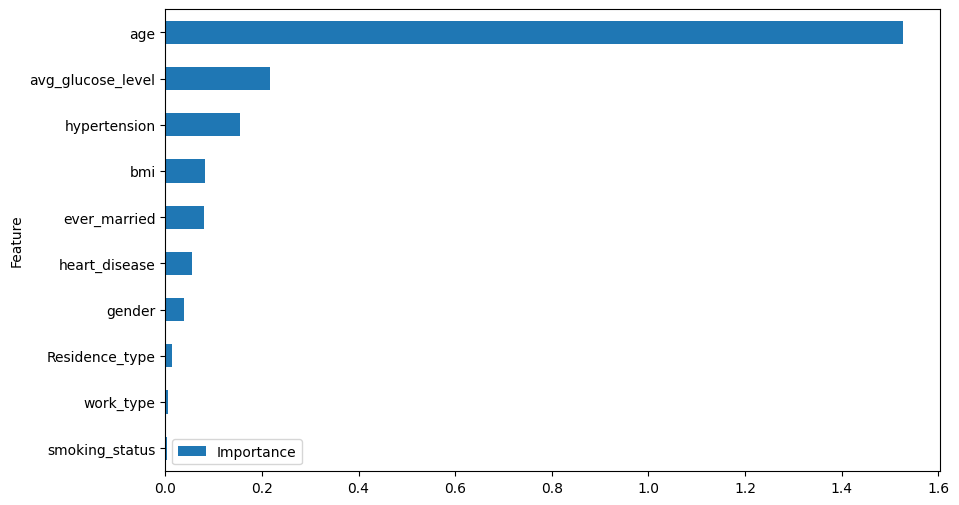

In [219]:
coefficients = copy.deepcopy(w_final)

feature_importance = pd.DataFrame({'Feature': x_data.columns.values, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

### Add polynomial features for improving model capacity

In [220]:
#pip install scikit-learn
from sklearn import preprocessing

In [221]:
poly = preprocessing.PolynomialFeatures(2, interaction_only=False, include_bias=False)

In [222]:
poly_values = poly.fit_transform(x_data)
poly_values

array([[1.00000e+00, 6.70000e+01, 0.00000e+00, ..., 1.33956e+03,
        3.66000e+01, 1.00000e+00],
       [1.00000e+00, 8.00000e+01, 0.00000e+00, ..., 1.05625e+03,
        6.50000e+01, 4.00000e+00],
       [0.00000e+00, 4.90000e+01, 0.00000e+00, ..., 1.18336e+03,
        1.03200e+02, 9.00000e+00],
       ...,
       [0.00000e+00, 4.50000e+01, 1.00000e+00, ..., 1.01124e+03,
        9.54000e+01, 9.00000e+00],
       [1.00000e+00, 4.00000e+01, 0.00000e+00, ..., 9.00000e+02,
        9.00000e+01, 9.00000e+00],
       [0.00000e+00, 8.00000e+01, 1.00000e+00, ..., 8.46810e+02,
        5.82000e+01, 4.00000e+00]])

In [223]:
poly_column_names = list(poly.get_feature_names_out(x_data.columns))
poly_column_names

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'gender^2',
 'gender age',
 'gender hypertension',
 'gender heart_disease',
 'gender ever_married',
 'gender work_type',
 'gender Residence_type',
 'gender avg_glucose_level',
 'gender bmi',
 'gender smoking_status',
 'age^2',
 'age hypertension',
 'age heart_disease',
 'age ever_married',
 'age work_type',
 'age Residence_type',
 'age avg_glucose_level',
 'age bmi',
 'age smoking_status',
 'hypertension^2',
 'hypertension heart_disease',
 'hypertension ever_married',
 'hypertension work_type',
 'hypertension Residence_type',
 'hypertension avg_glucose_level',
 'hypertension bmi',
 'hypertension smoking_status',
 'heart_disease^2',
 'heart_disease ever_married',
 'heart_disease work_type',
 'heart_disease Residence_type',
 'heart_disease avg_glucose_level',
 'heart_disease bmi',
 'heart_disease smoking_status',
 'ever_married^2',
 'ev

In [229]:
x_data = pd.DataFrame(poly_values, columns=poly_column_names)
x_data

gender   age  hypertension  heart_disease  ever_married  work_type  \
0        1.0  67.0           0.0            1.0           1.0        1.0   
1        1.0  80.0           0.0            1.0           1.0        1.0   
2        0.0  49.0           0.0            0.0           1.0        1.0   
3        0.0  79.0           1.0            0.0           1.0        2.0   
4        1.0  81.0           0.0            0.0           1.0        1.0   
...      ...   ...           ...            ...           ...        ...   
4976     1.0  41.0           0.0            0.0           0.0        1.0   
4977     1.0  40.0           0.0            0.0           1.0        1.0   
4978     0.0  45.0           1.0            0.0           1.0        0.0   
4979     1.0  40.0           0.0            0.0           1.0        1.0   
4980     0.0  80.0           1.0            0.0           1.0        1.0   

      Residence_type  avg_glucose_level   bmi  smoking_status  ...  \
0                1.0             228.69  36.6             1.0  ...   
1                0.0             105.92  32.5             2.0  ...   
2                1.0             171.23  34.4             3.0  ...   
3                0.0             174.12  24.0             2.0  ...   
4                1.0             186.21  29.0             1.0  ...   
...              ...                ...   ...             ...  ...   
4976             0.0              70.15  29.8             1.0  ...   
4977             1.0             191.15  31.1             3.0  ...   
4978             0.0              95.02  31.8             3.0  ...   
4979             0.0              83.94  30.0             3.0  ...   
4980             1.0              83.75  29.1             2.0  ...   

      Residence_type^2  Residence_type avg_glucose_level  Residence_type bmi  \
0                  1.0                            228.69                36.6   
1                  0.0                              0.00                 0.0   
2                  1.0                            171.23                34.4   
3                  0.0                              0.00                 0.0   
4                  1.0                            186.21                29.0   
...                ...                               ...                 ...   
4976               0.0                              0.00                 0.0   
4977               1.0                            191.15                31.1   
4978               0.0                              0.00                 0.0   
4979               0.0                              0.00                 0.0   
4980               1.0                             83.75                29.1   

      Residence_type smoking_status  avg_glucose_level^2  \
0                               1.0           52299.1161   
1                               0.0           11219.0464   
2                               3.0           29319.7129   
3                               0.0           30317.7744   
4                               1.0           34674.1641   
...                             ...                  ...   
4976                            0.0            4921.0225   
4977                            3.0           36538.3225   
4978                            0.0            9028.8004   
4979                            0.0            7045.9236   
4980                            2.0            7014.0625   

      avg_glucose_level bmi  avg_glucose_level smoking_status    bmi^2  \
0                  8370.054                            228.69  1339.56   
1                  3442.400                            211.84  1056.25   
2                  5890.312                            513.69  1183.36   
3                  4178.880                            348.24   576.00   
4                  5400.090                            186.21   841.00   
...                     ...                               ...      ...   
4976               2090.470                         

In [230]:
x_data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'gender^2', 'gender age', 'gender hypertension',
       'gender heart_disease', 'gender ever_married', 'gender work_type',
       'gender Residence_type', 'gender avg_glucose_level', 'gender bmi',
       'gender smoking_status', 'age^2', 'age hypertension',
       'age heart_disease', 'age ever_married', 'age work_type',
       'age Residence_type', 'age avg_glucose_level', 'age bmi',
       'age smoking_status', 'hypertension^2', 'hypertension heart_disease',
       'hypertension ever_married', 'hypertension work_type',
       'hypertension Residence_type', 'hypertension avg_glucose_level',
       'hypertension bmi', 'hypertension smoking_status', 'heart_disease^2',
       'heart_disease ever_married', 'heart_disease work_type',
       'heart_disease Residence_type', 'heart_disease avg_glucose_level',
       'heart_disease 

### Split data into training and validation datasets: Default 80% train, 20% validation

In [231]:
x_train, x_validation, y_train, y_validation = train_test_split(x_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

In [232]:
x_train = x_train.to_numpy()
x_validation = x_validation.to_numpy()
y_train = y_train.to_numpy()
y_validation = y_validation.to_numpy()

### Visualize how one sample looks like

In [233]:
x_train[0]

array([0.00000000e+00, 2.40000000e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.87990000e+02,
       2.49000000e+01, 3.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.76000000e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.40000000e+01, 0.00000000e+00, 4.51176000e+03, 5.97600000e+02,
       7.20000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       1.87990000e+02, 2.49000000e+01, 3.00000000e+00, 0.00000000e+00,
      

### Visualize the nuber of training samples and number of validation samples

In [234]:
len(y_train), len(y_validation)

(3984, 997)

### Visualize the number of no stroke vs stroke samples in training dataset

#### Having 95.0% samples with no stroke and 5.0% samples with stroke in our dataset  
#### So we have a ratio of approximately 19 no-stroke samples to 1 stroke sample  
#### Our training and validation dataset should respect this ratio approximately


In [235]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([3786,  198]))

#### 4733 samples of 0 (no stroke) and 248 samples of 1 (stroke)  
#### 248 * 19 = 4712


### Visualize the number of no stroke vs stroke samples in validation dataset

#### 946 samples of 0 (no stroke) and 50 samples of 1 (stroke)  
#### 50 * 19 = 950


In [236]:
np.unique(y_validation, return_counts=True)

(array([0, 1]), array([947,  50]))

### Standardization - mean and standard deviation calculation

In [237]:
mean   = np.mean(x_train, axis=0)
sigma  = np.std(x_train, axis=0)

In [238]:
x_train = (x_train - mean) / sigma

### Very important! Validation dataset MUST BE standardized using mean and standard deviation calculated from the training dataset

In [239]:
x_validation = (x_validation - mean) / sigma

### View min and max values after standardization from training dataset

In [240]:
x_train.min(), x_train.max()

(np.float64(-2.1572446501419917), np.float64(9.524730509958266))

### View min and max values after standardization from training dataset

In [241]:
x_validation.min(), x_validation.max()

(np.float64(-2.1424494670349197), np.float64(8.695710702144261))

### Train with polynomial features

In [242]:
def gradient_descent(x_train, y_train, x_validation, y_validation, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_=1):
    # number of training examples
    m = len(x_train)

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_train_history = []
    J_valid_history = []
    w_history = []

    best_train_score = cost_function(x_train, y_train, w_in, b_in, lambda_)
    best_validation_score = cost_valid =  compute_cost(x_validation, y_validation, w_in, b_in, lambda_)
    best_w_in_train = copy.deepcopy(w_in)
    best_b_train = copy.deepcopy(b_in)
    best_w_in_valid = copy.deepcopy(w_in)
    best_b_valid = copy.deepcopy(b_in)

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(x_train, y_train, w_in, b_in, lambda_)

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        cost_train =  cost_function(x_train, y_train, w_in, b_in, lambda_)
        J_train_history.append(cost_train)

        cost_valid =  compute_cost(x_validation, y_validation, w_in, b_in, lambda_)
        J_valid_history.append(cost_valid)

        if best_train_score > cost_train:
            best_train_score = cost_train
            np.save(f'model/best_poly_train_w_in.npy', w_in)    # .npy extension is added if not given
            np.save(f'model/best_poly_train_b.npy', b_in)


        if best_validation_score > cost_valid:
            best_validation_score = cost_valid
            np.save(f'model/best_poly_valid_w_in.npy', w_in)    # .npy extension is added if not given
            np.save(f'model/best_poly_valid_b.npy', b_in)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost Train: {float(J_train_history[-1].squeeze()):f} \t  Cost Validation: {float(J_valid_history[-1].squeeze()):f}")

    return w_in, b_in, J_train_history, J_valid_history, w_history #return w and J,w history for graphing

In [243]:
initial_w = np.zeros(len(x_train[0]))
initial_b = 0

# Some gradient descent settings
iterations = 1000
alpha = 0.3
lambda_ = 0

w_final, b_final, J_train_history, J_valid_history, _ = gradient_descent(x_train=x_train, y_train=y_train, x_validation=x_validation, y_validation=y_validation, w_in=initial_w, b_in=initial_b, cost_function=compute_cost, gradient_function=compute_gradient, alpha=alpha, num_iters=iterations, lambda_=lambda_)

<ipython-input-197-ca3a02e9c328>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j] += err_i * X[i,j]      #scalar


Iteration    0: Cost Train: 0.628331 	  Cost Validation: 0.626000
Iteration  100: Cost Train: 0.167120 	  Cost Validation: 0.170824
Iteration  200: Cost Train: 0.158870 	  Cost Validation: 0.163162
Iteration  300: Cost Train: 0.156739 	  Cost Validation: 0.161482
Iteration  400: Cost Train: 0.155812 	  Cost Validation: 0.160976
Iteration  500: Cost Train: 0.155279 	  Cost Validation: 0.160832
Iteration  600: Cost Train: 0.154914 	  Cost Validation: 0.160824
Iteration  700: Cost Train: 0.154636 	  Cost Validation: 0.160873
Iteration  800: Cost Train: 0.154409 	  Cost Validation: 0.160946
Iteration  900: Cost Train: 0.154216 	  Cost Validation: 0.161030
Iteration  999: Cost Train: 0.154048 	  Cost Validation: 0.161116


In [244]:
best_poly_w_final = np.load('model/best_poly_valid_w_in.npy')
best_poly_b_final = np.load('model/best_poly_valid_b.npy')

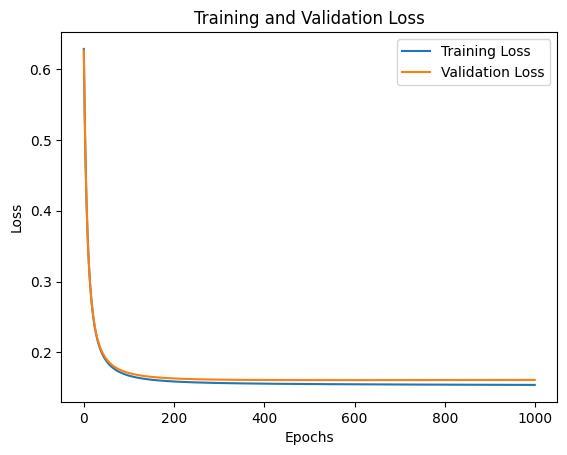

In [245]:
# Generate a sequence of integers to represent the epoch numbers
#epochs = range(1, iterations+1)

# Plot and label the training and validation loss values
plt.plot(J_train_history, label='Training Loss')
plt.plot(J_valid_history, label='Validation Loss')

# Add in a title and axes labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Set the tick locations
#plt.xticks(np.arange(0, iterations+1, 2))

# Display the plot
plt.legend(loc='best')
plt.show()

In [246]:
def predict(X, w, b):
    # number of training examples
    m, n = X.shape
    p = np.zeros(m)

    for i in range(m):
        z_wb = 0
        # Loop over each feature
        for j in range(n):
            # Add the corresponding term to z_wb
            z_wb += X[i][j] * w[j]

        # Add bias term
        z_wb += b

        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        p[i] = f_wb >= 0.5

    return p

In [247]:
y_predicted = predict(x_train, w_final, b_final)

<ipython-input-246-bde3be517903>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p[i] = f_wb >= 0.5


In [248]:
y_train.shape

(3984, 1)

In [249]:
y_train.reshape(-1).shape, y_predicted.shape

((3984,), (3984,))

In [250]:
(y_train.reshape(-1) == y_predicted).sum()

np.int64(3785)

In [251]:
y_train = y_train.reshape(-1)

In [252]:
(accuracy, precision, recall, specificity, f1_score, false_negative_rate, false_positive_rate) = metrics_computations(x=x_train,
                                                                                                                     y_true=y_train,
                                                                                                                     y_predicted=y_predicted)

In [253]:
print(f"[TRAIN] Accuracy: {(accuracy * 100.):.2f}% \n Precision: {(precision * 100):.2f}% \n Recall: {(recall * 100):.2f}% \n F1 Score: {(f1_score * 100.):.2f}% \n Specificity: {(specificity * 100):.2f}% \n False Positive Rate: {(false_positive_rate * 100):.2f}% \n False Negative Rate: {(false_negative_rate * 100):.2f}%")

[TRAIN] Accuracy: 95.01% 
 Precision: 42.86% 
 Recall: 1.52% 
 F1 Score: 2.93% 
 Specificity: 99.89% 
 False Positive Rate: 0.11% 
 False Negative Rate: 98.48%


In [254]:
y_predicted_validation = predict(x_validation, w_final, b_final)

<ipython-input-246-bde3be517903>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p[i] = f_wb >= 0.5


In [255]:
y_validation = y_validation.reshape(-1)

In [256]:
(accuracy, precision, recall, specificity, f1_score, false_negative_rate, false_positive_rate) = metrics_computations(x=x_validation,
                                                                                                                     y_true=y_validation,
                                                                                                                     y_predicted=y_predicted_validation)

<ipython-input-211-78dae71eb1fc>:14: RuntimeWarning: invalid value encountered in scalar divide
  f1_score = (2 * precision * recall) / (precision + recall)


In [257]:
print(f"[VALID] Accuracy: {(accuracy * 100.):.2f}% \n Precision: {(precision * 100):.2f}% \n Recall: {(recall * 100):.2f}% \n F1 Score: {(f1_score * 100.):.2f}% \n Specificity: {(specificity * 100):.2f}% \n False Positive Rate: {(false_positive_rate * 100):.2f}% \n False Negative Rate: {(false_negative_rate * 100):.2f}%")

[VALID] Accuracy: 94.88% 
 Precision: 0.00% 
 Recall: 0.00% 
 F1 Score: nan% 
 Specificity: 99.89% 
 False Positive Rate: 0.11% 
 False Negative Rate: 100.00%


### Analyze the feature importance

<Axes: ylabel='Feature'>

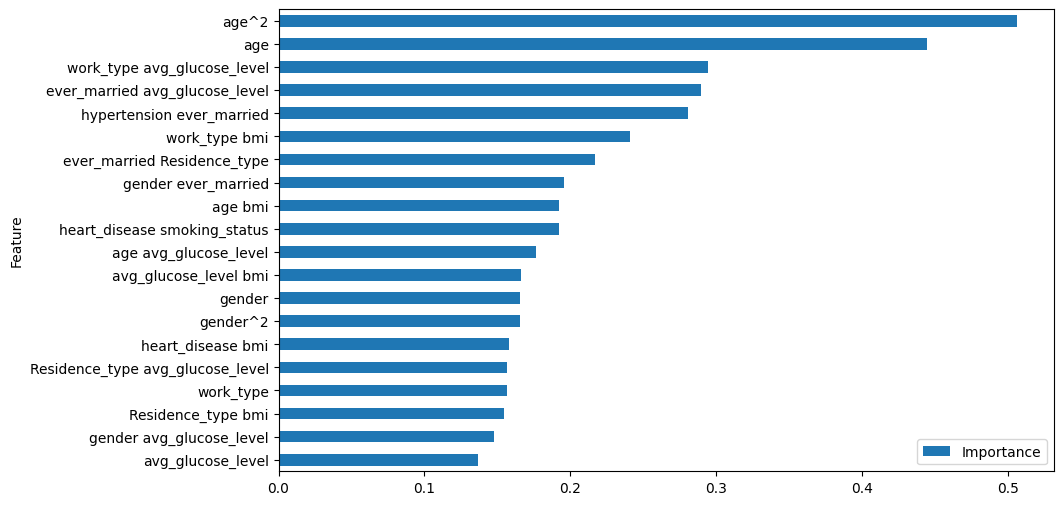

In [258]:
coefficients = copy.deepcopy(w_final)

feature_importance = pd.DataFrame({'Feature': x_data.columns.values, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.tail(20).plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

#### For example, the most important feature might be obtained by multiplying two features: avg_glucose_level and bmi


### Decision Tree
#### Specialized in learning non-linear data
#### No need for Normalization/Standardization
#### No need for Polynomial Feature Transformation

In [259]:
x_data = data.drop(columns=['stroke'])


### Split data into training and validation datasets: Default 80% train, 20% validation

In [260]:
x_train, x_validation, y_train, y_validation = train_test_split(x_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

In [261]:
x_train = x_train.to_numpy()
x_validation = x_validation.to_numpy()
y_train = y_train.to_numpy()
y_validation = y_validation.to_numpy()

### Visualize how one sample looks like

In [263]:
x_train[0]

array([  0.  ,  24.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  , 187.99,
        24.9 ,   3.  ])

### Visualize the nuber of training samples and number of validation samples

In [264]:
len(y_train), len(y_validation)

(3984, 997)

### Visualize the number of no stroke vs stroke samples in training dataset


#### Having 95.0% samples with no stroke and 5.0% samples with stroke in our dataset  
#### So we have a ratio of approximately 19 no-stroke samples to 1 stroke sample  
#### Our training and validation dataset should respect this ratio approximately


In [265]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([3786,  198]))

#### 4733 samples of 0 (no stroke) and 248 samples of 1 (stroke)  
#### 248 * 19 = 4712


### Visualize the number of no stroke vs stroke samples in validation dataset


#### 946 samples of 0 (no stroke) and 50 samples of 1 (stroke)  
#### 50 * 19 = 950


In [266]:
np.unique(y_validation, return_counts=True)

(array([0, 1]), array([947,  50]))

In [267]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score

### Decision Tree Code and Implementation

#### Declare Decision Tree with corresponding Hyperparameters

In [269]:
classifier = DecisionTreeClassifier(criterion='entropy', min_samples_split=2, max_depth=5)

In [270]:
type(x_train)

numpy.ndarray

#### Train the Decision Tree

In [271]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

#### Predict on the training dataset

In [272]:
y_predicted = classifier.predict(x_train)
y_predicted = np.array(y_predicted)

### Display training metrics

In [273]:
(accuracy, precision, recall, specificity, f1_score, false_negative_rate, false_positive_rate) = metrics_computations(x=x_train,
                                                                                                                     y_true=y_train.reshape(-1),
                                                                                                                     y_predicted=y_predicted)

In [274]:
print(f"[TRAIN] Accuracy: {(accuracy * 100.):.2f}% \n Precision: {(precision * 100):.2f}% \n Recall: {(recall * 100):.2f}% \n F1 Score: {(f1_score * 100.):.2f}% \n Specificity: {(specificity * 100):.2f}% \n False Positive Rate: {(false_positive_rate * 100):.2f}% \n False Negative Rate: {(false_negative_rate * 100):.2f}%")

[TRAIN] Accuracy: 95.31% 
 Precision: 76.19% 
 Recall: 8.08% 
 F1 Score: 14.61% 
 Specificity: 99.87% 
 False Positive Rate: 0.13% 
 False Negative Rate: 91.92%


### Display validation metrics

In [275]:
y_predicted_valid = classifier.predict(x_validation)
y_predicted_valid = np.array(y_predicted_valid)

In [276]:
(accuracy, precision, recall, specificity, f1_score, false_negative_rate, false_positive_rate) = metrics_computations(x=x_validation,
                                                                                                                     y_true=y_validation.reshape(-1),
                                                                                                                     y_predicted=y_predicted_valid)

<ipython-input-211-78dae71eb1fc>:14: RuntimeWarning: invalid value encountered in scalar divide
  f1_score = (2 * precision * recall) / (precision + recall)


In [279]:
print(f"[VALID] Accuracy: {(accuracy * 100.):.2f}% \n Precision: {(precision * 100):.2f}% \n Recall: {(recall * 100):.2f}% \n F1 Score: {(f1_score * 100.):.2f}% \n Specificity: {(specificity * 100):.2f}% \n False Positive Rate: {(false_positive_rate * 100):.2f}% \n False Negative Rate: {(false_negative_rate * 100):.2f}%")

[VALID] Accuracy: 94.28% 
 Precision: 0.00% 
 Recall: 0.00% 
 F1 Score: nan% 
 Specificity: 99.26% 
 False Positive Rate: 0.74% 
 False Negative Rate: 100.00%


### Display Decision Tree and Learned rules by the Tree

In [280]:
list(x_data.columns)

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [281]:
from sklearn.tree import plot_tree


In [282]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize=(70,50), dpi=300)
plot_tree(classifier, filled=True, fontsize=20, feature_names=list(x_data.columns),rounded=True, ax=axes)
plt.savefig('decisionTree.png')

In [287]:
text_representation = export_text(classifier, feature_names=list(x_data.columns), class_names = ['No Stroke', 'Stroke'])
print(text_representation)

|--- age <= 53.50
|   |--- age <= 37.50
|   |   |--- avg_glucose_level <= 76.16
|   |   |   |--- avg_glucose_level <= 76.12
|   |   |   |   |--- work_type <= 2.50
|   |   |   |   |   |--- class: No Stroke
|   |   |   |   |--- work_type >  2.50
|   |   |   |   |   |--- class: No Stroke
|   |   |   |--- avg_glucose_level >  76.12
|   |   |   |   |--- class: Stroke
|   |   |--- avg_glucose_level >  76.16
|   |   |   |--- class: No Stroke
|   |--- age >  37.50
|   |   |--- hypertension <= 0.50
|   |   |   |--- bmi <= 23.95
|   |   |   |   |--- class: No Stroke
|   |   |   |--- bmi >  23.95
|   |   |   |   |--- avg_glucose_level <= 171.78
|   |   |   |   |   |--- class: No Stroke
|   |   |   |   |--- avg_glucose_level >  171.78
|   |   |   |   |   |--- class: No Stroke
|   |   |--- hypertension >  0.50
|   |   |   |--- age <= 49.50
|   |   |   |   |--- class: No Stroke
|   |   |   |--- age >  49.50
|   |   |   |   |--- bmi <= 41.70
|   |   |   |   |   |--- class: No Stroke
|   |   |   |   |

In [284]:
from sklearn.tree import _tree

In [285]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []

    def recurse(node, path, paths):

        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]

    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]

    rules = []
    for path in paths:
        rule = "if "

        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]

    return rules

In [288]:
rules = get_rules(classifier, feature_names=list(x_data.columns), class_names = ['No Stroke', 'Stroke'])
for r in rules:
    print(r)

if (age <= 53.5) and (age <= 37.5) and (avg_glucose_level > 76.16) then class: No Stroke (proba: 100.0%) | based on 1,147 samples
if (age <= 53.5) and (age > 37.5) and (hypertension <= 0.5) and (bmi > 23.95) and (avg_glucose_level <= 171.78) then class: No Stroke (proba: 97.64%) | based on 678 samples
if (age > 53.5) and (age <= 67.5) and (avg_glucose_level <= 111.8) and (avg_glucose_level > 59.735) and (avg_glucose_level > 60.015) then class: No Stroke (proba: 95.28%) | based on 509 samples
if (age > 53.5) and (age > 67.5) and (avg_glucose_level <= 126.84) and (bmi <= 36.85) and (avg_glucose_level <= 110.72) then class: No Stroke (proba: 84.62%) | based on 390 samples
if (age <= 53.5) and (age <= 37.5) and (avg_glucose_level <= 76.16) and (avg_glucose_level <= 76.125) and (work_type <= 2.5) then class: No Stroke (proba: 100.0%) | based on 271 samples
if (age > 53.5) and (age > 67.5) and (avg_glucose_level > 126.84) and (avg_glucose_level > 135.06) and (bmi > 25.75) then class: No Stro